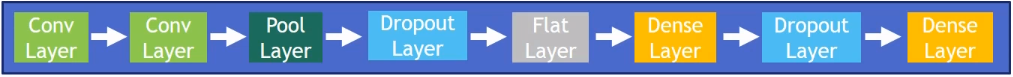

In [2]:
# Mnist 데이터 불러오기 및 정규화
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 텐서로 변환 (높이, 너비, 채널)
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
# CNN 모델 구축
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())  # 3차원 텐서를 1차원 벡터로 변환

cnn.add(Dense(128, activation='relu'))  # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))   # 출력층

In [5]:
# CNN 모델 컴파일 및 학스
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 36s 10ms/step - loss: 0.2402 - accuracy: 0.9259 - val_loss: 0.0567 - val_accuracy: 0.9822
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0393 - val_accuracy: 0.9865
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0654 - accuracy: 0.9806 - val_loss: 0.0336 - val_accuracy: 0.9892
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0295 - val_accuracy: 0.9903
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0315 - val_accuracy: 0.9903
Epoc

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9943


[0.03134195879101753, 0.9943000078201294]

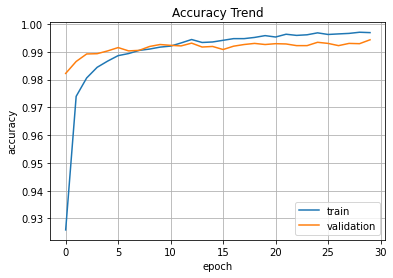

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

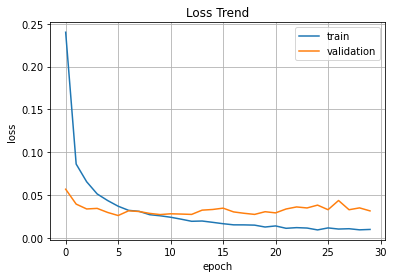

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()